In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\RDX\\Desktop\\Varun/audit_risk.csv')

In [3]:
df.sample(n=10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
144,3.41,8,8.03,0.6,4.818,94.43,0.6,56.658,102.46,5.5,...,0.4,2,0.6,1.2,4.8,71.666,1.6,0.5,57.3328,1
16,3.89,37,8.54,0.6,5.124,31.63,0.6,18.978,40.17,5.0,...,0.4,1,0.4,0.4,4.2,50.670,0.8,0.5,20.2680,1
506,21.61,19,0.53,0.2,0.106,0.62,0.2,0.124,1.15,5.0,...,0.4,0,0.2,0.0,2.0,1.632,0.4,0.5,0.3264,0
196,2.72,8,3.62,0.6,2.172,44.28,0.6,26.568,47.90,5.0,...,0.4,0,0.2,0.0,4.0,56.942,0.4,0.5,11.3884,1
628,55.57,8,0.84,0.2,0.168,0.00,0.2,0.000,0.84,5.0,...,0.8,0,0.2,0.0,2.2,1.968,0.8,0.5,0.7872,0
564,59.85,9,0.30,0.2,0.060,0.00,0.2,0.000,0.30,5.0,...,0.4,0,0.2,0.0,2.0,1.460,0.4,0.5,0.2920,0
404,1.85,4,0.56,0.2,0.112,72.00,0.6,43.200,72.56,5.0,...,0.4,0,0.2,0.0,3.2,44.814,0.4,0.5,8.9628,1
426,1.85,11,0.44,0.2,0.088,0.62,0.2,0.124,1.06,5.0,...,0.4,0,0.2,0.0,2.0,1.740,0.4,0.5,0.3480,0
206,2.72,13,3.84,0.6,2.304,144.39,0.6,86.634,148.23,5.0,...,0.8,1,0.4,0.4,4.4,102.946,1.2,0.5,61.7676,1
55,3.89,9,0.00,0.2,0.000,1.05,0.2,0.210,1.05,5.0,...,0.4,0,0.2,0.0,2.0,1.642,0.4,0.5,0.3284,0


In [4]:
df.shape

(776, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    int64  
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

**CHECK WITH THE MISSING VALUES**

In [6]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

We can see that only Money_Value have one missing value. Exploring that variable to treat that missing value.

In [7]:
df.Money_Value.value_counts()

0.00     332
0.04      11
0.02       9
0.06       8
0.05       7
        ... 
22.10      1
8.38       1
4.24       1
34.32      1
2.40       1
Name: Money_Value, Length: 328, dtype: int64

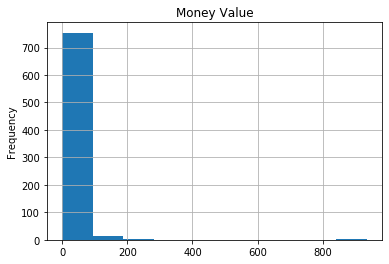

In [8]:
df['Money_Value'].plot(kind='hist')
plt.title('Money Value')
plt.grid()
plt.show()

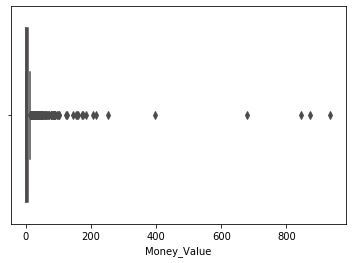

In [9]:
sns.boxplot(df['Money_Value'],color='red')
plt.show()

In [10]:
#Finding IQR
iqr=df['Money_Value'].quantile(0.75) - df['Money_Value'].quantile(0.25)
iqr

5.595000000000001

In [11]:
LL=df['Money_Value'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['Money_Value'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -8.392500000000002
UpperEnd= 13.987500000000002


In [12]:
df['Money_Value'].describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

# Exploring the Response Variable

In [13]:
df.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

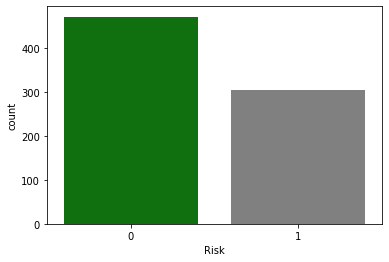

In [14]:
sns.countplot(df['Risk'],palette=['green','grey'])
plt.show()

# Balancing the data using SMOTE 

In [15]:
not_default = df[df.Risk==0]

In [16]:
len(not_default)

471

In [17]:
default = df[df.Risk==1] 
len(default)

305

In [18]:
from sklearn.utils import resample
default_upsampled = resample(default,
                          replace=True, 
                          n_samples=len(not_default), 
                          random_state=27) 
default_upsampled

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
36,3.89,20,9.01,0.6,5.406,19.82,0.6,11.892,28.83,5.0,...,0.4,0,0.2,0.0,3.8,22.566,0.4,0.5,4.5132,1
281,2.37,22,2.39,0.6,1.434,7.72,0.6,4.632,10.11,5.0,...,0.4,1,0.4,0.4,4.0,10.034,0.8,0.5,4.0136,1
58,3.89,11,6.67,0.6,4.002,18.02,0.6,10.812,24.69,5.5,...,0.4,2,0.6,1.2,4.4,19.604,1.6,0.5,15.6832,1
416,1.85,19,2.81,0.6,1.686,0.11,0.2,0.022,2.92,5.0,...,1.2,0,0.2,0.0,3.2,15.578,1.2,0.5,9.3468,1
612,55.57,13,2.45,0.6,1.470,5.47,0.6,3.282,7.92,5.0,...,0.4,0,0.2,0.0,3.8,8.396,0.4,0.5,1.6792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3.41,12,1.07,0.4,0.428,0.00,0.2,0.000,1.07,5.0,...,1.2,0,0.2,0.0,2.6,2.628,1.2,0.5,1.5768,1
401,1.85,19,9.14,0.6,5.484,1.22,0.4,0.488,10.36,5.0,...,1.2,0,0.2,0.0,3.4,8.172,1.2,0.5,4.9032,1
166,3.41,14,16.53,0.6,9.918,72.99,0.6,43.794,89.52,5.0,...,0.4,1,0.4,0.4,4.0,57.708,0.8,0.5,23.0832,1
325,2.37,2,7.59,0.6,4.554,1.47,0.4,0.588,9.06,5.5,...,1.2,0,0.2,0.0,4.2,30.316,1.2,0.5,18.1896,1


In [19]:
upsampled = pd.concat([not_default, default_upsampled]) 
upsampled

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3.41,12,1.07,0.4,0.428,0.00,0.2,0.000,1.07,5.0,...,1.2,0,0.2,0.0,2.6,2.628,1.2,0.5,1.5768,1
401,1.85,19,9.14,0.6,5.484,1.22,0.4,0.488,10.36,5.0,...,1.2,0,0.2,0.0,3.4,8.172,1.2,0.5,4.9032,1
166,3.41,14,16.53,0.6,9.918,72.99,0.6,43.794,89.52,5.0,...,0.4,1,0.4,0.4,4.0,57.708,0.8,0.5,23.0832,1
325,2.37,2,7.59,0.6,4.554,1.47,0.4,0.588,9.06,5.5,...,1.2,0,0.2,0.0,4.2,30.316,1.2,0.5,18.1896,1


In [20]:
upsampled.Risk.value_counts()

0    471
1    471
Name: Risk, dtype: int64

In [21]:
upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1 to 7
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    942 non-null    float64
 1   LOCATION_ID     942 non-null    int64  
 2   PARA_A          942 non-null    float64
 3   Score_A         942 non-null    float64
 4   Risk_A          942 non-null    float64
 5   PARA_B          942 non-null    float64
 6   Score_B         942 non-null    float64
 7   Risk_B          942 non-null    float64
 8   TOTAL           942 non-null    float64
 9   numbers         942 non-null    float64
 10  Score_B.1       942 non-null    float64
 11  Risk_C          942 non-null    float64
 12  Money_Value     941 non-null    float64
 13  Score_MV        942 non-null    float64
 14  Risk_D          942 non-null    float64
 15  District_Loss   942 non-null    int64  
 16  PROB            942 non-null    float64
 17  RiSk_E          942 non-null    float

In [22]:
upsampled.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

**Replacing the missing value with median**

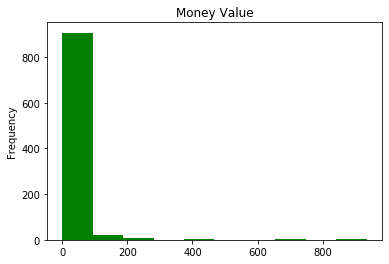

In [23]:
upsampled['Money_Value'].plot(kind='hist',color='green')
plt.title('Money Value')
plt.show()

In [24]:
upsampled['Money_Value']=upsampled['Money_Value'].fillna(upsampled['Money_Value'].median())

As the Money_value distribution is not symmetrical, we are replacing that missing value using median.

# Exploring each variable

**Sector Score**

In [25]:
upsampled.Sector_score.value_counts()

55.57    227
3.89     163
1.85     110
2.72     107
3.41     103
2.37      86
1.99      55
21.61     43
59.85     36
2.34       6
15.56      4
17.68      1
2.36       1
Name: Sector_score, dtype: int64

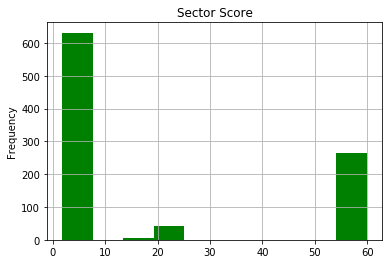

In [26]:
upsampled.Sector_score.plot(kind='hist',color='green')
plt.title('Sector Score')
plt.grid()
plt.show()

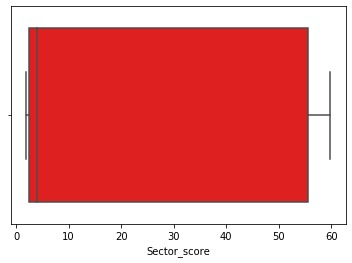

In [27]:
sns.boxplot(upsampled.Sector_score,color='red')
plt.show()

As we can see that there are no outliers in the Sector score

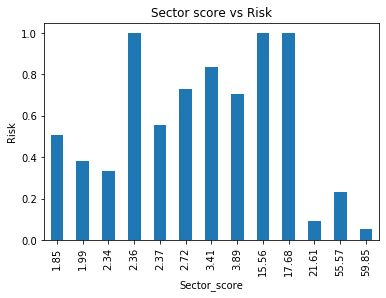

In [28]:
upsampled.groupby('Sector_score')['Risk'].mean().plot(kind='bar')
plt.title('Sector score vs Risk')
plt.ylabel('Risk')
plt.show()

In [29]:
upsampled.groupby('Sector_score')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector_score,,,,,,,,
1.85,110.0,0.509091,0.502205,0.0,0.0,1.0,1.00,1.0
1.99,55.0,0.381818,0.490310,0.0,0.0,0.0,1.00,1.0
2.34,6.0,0.333333,0.516398,0.0,0.0,0.0,0.75,1.0
2.36,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
2.37,86.0,0.558140,0.499521,0.0,0.0,1.0,1.00,1.0
2.72,107.0,0.728972,0.446582,0.0,0.0,1.0,1.00,1.0
3.41,103.0,0.834951,0.373040,0.0,1.0,1.0,1.00,1.0
3.89,163.0,0.705521,0.457213,0.0,0.0,1.0,1.00,1.0
15.56,4.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


**From the above result, we can see the mean, std ,min and max of the Sector score with respect to response variable Risk**

# LOCATION_ID

In [30]:
upsampled['LOCATION_ID'].value_counts()


19    94
8     82
16    75
12    62
9     61
2     58
13    50
5     48
15    39
4     39
6     35
32    33
22    31
14    23
29    23
11    22
31    18
18    18
37    14
39    12
20    11
1     11
27    10
28    10
21     9
43     7
25     6
40     6
38     5
7      4
33     4
35     3
30     3
36     3
42     3
41     3
3      2
44     2
23     2
17     1
Name: LOCATION_ID, dtype: int64

In [31]:
upsampled['LOCATION_ID'].dtype

dtype('int64')

The Location ID is actually continous variable but it was mentioned as object.So, we need to convert the datatype.

In [32]:
upsampled['LOCATION_ID']=pd.to_numeric(upsampled['LOCATION_ID'],errors='coerce')

In [33]:
upsampled['LOCATION_ID'].dtype

dtype('int64')

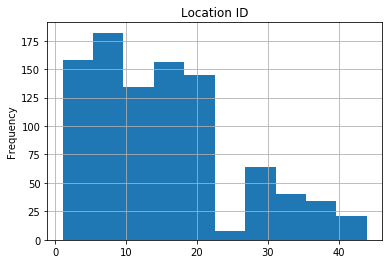

In [34]:
upsampled['LOCATION_ID'].plot(kind='hist')
plt.title('Location ID')
plt.grid()
plt.show()

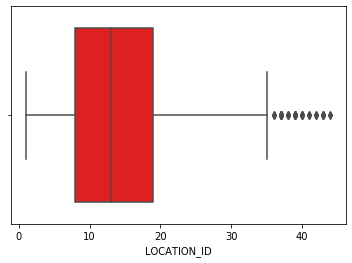

In [35]:
sns.boxplot(upsampled['LOCATION_ID'],color='red')
plt.show()

The Location ID have Outliers so check with lower end and Upper end

In [36]:
#Finding IQR
iqr=df['LOCATION_ID'].quantile(0.75) - df['LOCATION_ID'].quantile(0.25)
iqr

11.0

In [37]:
LL=upsampled['LOCATION_ID'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=upsampled['LOCATION_ID'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -8.5
UpperEnd= 35.5


In [38]:
len(upsampled[upsampled['LOCATION_ID'] > UL])

55

In [39]:
upsampled=upsampled[upsampled['LOCATION_ID'] <= UL]

In [40]:
upsampled.shape

(887, 27)

In [41]:
upsampled.groupby('LOCATION_ID')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
LOCATION_ID,,,,,,,,
1,11.0,0.818182,0.404520,0.0,1.00,1.0,1.00,1.0
2,58.0,0.827586,0.381039,0.0,1.00,1.0,1.00,1.0
3,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
4,39.0,0.307692,0.467572,0.0,0.00,0.0,1.00,1.0
5,48.0,0.208333,0.410414,0.0,0.00,0.0,0.00,1.0
6,35.0,0.171429,0.382385,0.0,0.00,0.0,0.00,1.0
7,4.0,0.750000,0.500000,0.0,0.75,1.0,1.00,1.0
8,82.0,0.414634,0.495691,0.0,0.00,0.0,1.00,1.0
9,61.0,0.393443,0.492568,0.0,0.00,0.0,1.00,1.0


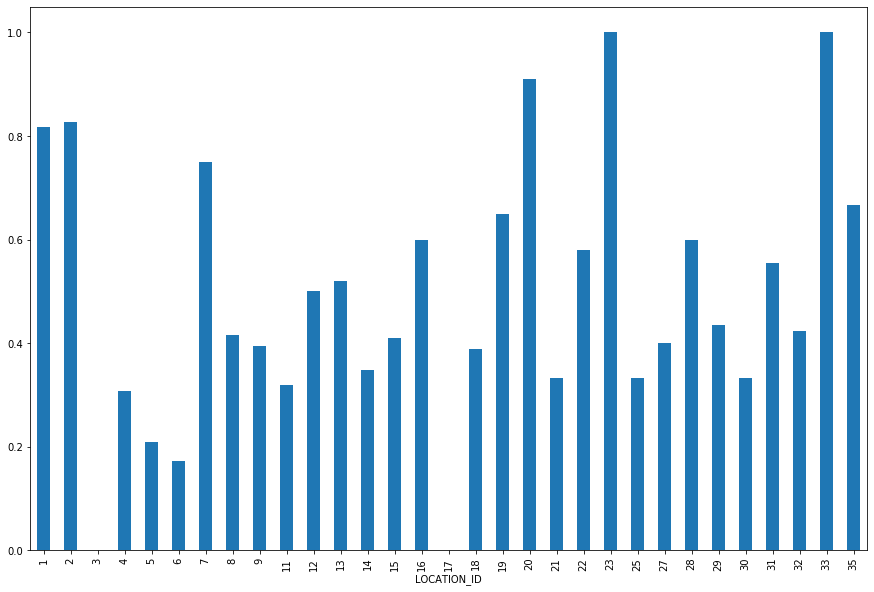

In [42]:
plt.figure(figsize=(15,10))
upsampled.groupby('LOCATION_ID')['Risk'].mean().plot(kind='bar')
plt.show()

# PARA_A

In [43]:
upsampled.PARA_A.value_counts()

0.00    169
1.06      8
0.51      8
0.56      8
0.49      7
       ... 
0.69      1
0.11      1
0.87      1
0.57      1
8.50      1
Name: PARA_A, Length: 309, dtype: int64

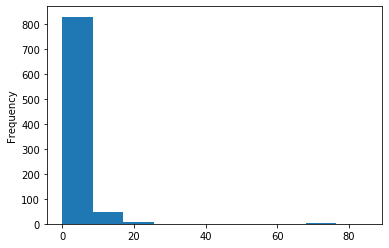

In [44]:
upsampled.PARA_A.plot(kind='hist')
plt.show()

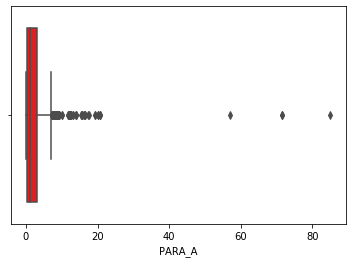

In [45]:
sns.boxplot(upsampled.PARA_A,color='red')
plt.show()

In [46]:
#Finding IQR
iqr=df['PARA_A'].quantile(0.75) - df['PARA_A'].quantile(0.25)
iqr

2.27

In [47]:
LL=upsampled['PARA_A'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=upsampled['PARA_A'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -3.1300000000000003
UpperEnd= 6.4350000000000005


In [48]:
len(upsampled[upsampled['PARA_A'] > 40])

4

In [49]:
upsampled=upsampled[upsampled['LOCATION_ID'] < 40]

In [50]:
upsampled.shape

(887, 27)

In [51]:
upsampled.groupby('PARA_A')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
PARA_A,,,,,,,,
0.00,169.0,0.301775,0.460392,0.0,0.0,0.0,1.0,1.0
0.01,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.02,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.03,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.04,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
20.04,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
20.65,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
57.03,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


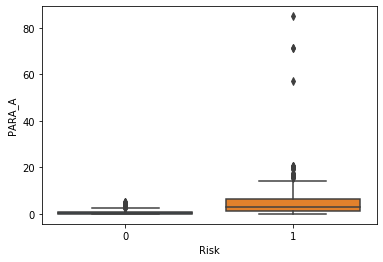

In [52]:
sns.boxplot(x='Risk',y='PARA_A',data=upsampled)
plt.show()

# Score_A

In [53]:
upsampled.Score_A.value_counts()

0.2    431
0.6    284
0.4    172
Name: Score_A, dtype: int64

**As we can see the variable Score_A is having three level, so it can be considered as categorical variable**

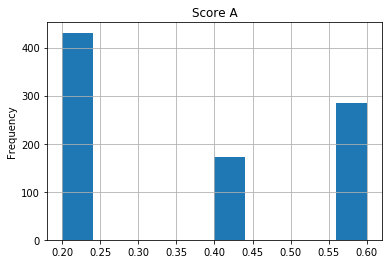

In [54]:
upsampled.Score_A.plot(kind='hist')
plt.title('Score A')
plt.grid()
plt.show()

In [55]:
upsampled.groupby('Score_A')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Score_A,,,,,,,,
0.2,431.0,0.215777,0.411839,0.0,0.0,0.0,0.0,1.0
0.4,172.0,0.505814,0.501426,0.0,0.0,1.0,1.0,1.0
0.6,284.0,0.890845,0.312384,0.0,1.0,1.0,1.0,1.0


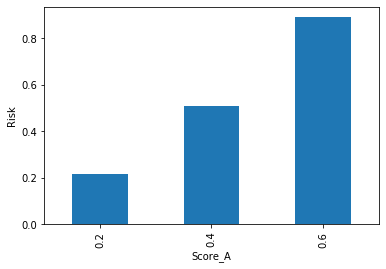

In [56]:
upsampled.groupby('Score_A')['Risk'].mean().plot(kind='bar')
plt.ylabel('Risk')
plt.show()

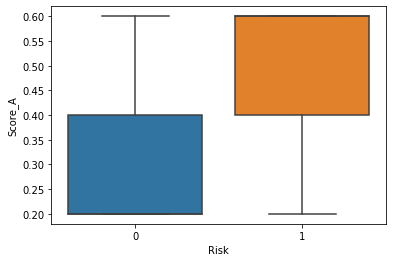

In [57]:
sns.boxplot(x='Risk',y='Score_A',data=upsampled)
plt.show()

# Risk_A

In [58]:
upsampled.Risk_A.value_counts()

0.000    169
0.424      8
0.102      8
0.112      8
0.098      7
        ... 
0.138      1
0.022      1
0.174      1
0.114      1
5.100      1
Name: Risk_A, Length: 309, dtype: int64

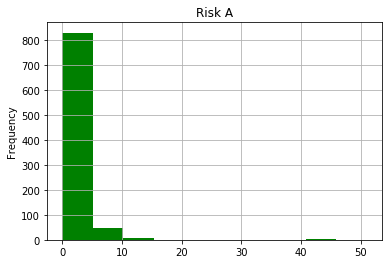

In [59]:
upsampled.Risk_A.plot(kind='hist',color='green')
plt.title('Risk A')
plt.grid()
plt.show()

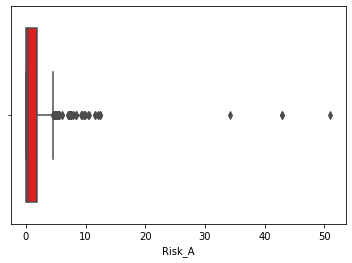

In [60]:
sns.boxplot(upsampled.Risk_A,color='red')
plt.show()

In [61]:
#Finding IQR
iqr=upsampled['Risk_A'].quantile(0.75) - upsampled['Risk_A'].quantile(0.25)
iqr

1.7630000000000001

In [62]:
LL=upsampled['Risk_A'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=upsampled['Risk_A'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -2.5895
UpperEnd= 4.4625


In [63]:
len(upsampled[upsampled['PARA_A'] > 20])

9

In [64]:
upsampled=upsampled[upsampled['LOCATION_ID'] < 20]

In [65]:
upsampled.shape

(724, 27)

In [66]:
upsampled.groupby('Risk_A')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_A,,,,,,,,
0.000,143.0,0.307692,0.463161,0.0,0.00,0.0,1.0,1.0
0.002,3.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
0.004,3.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
0.006,2.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
0.010,4.0,0.750000,0.500000,0.0,0.75,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
12.024,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
12.390,3.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
34.218,1.0,1.000000,NaN,1.0,1.00,1.0,1.0,1.0


In [67]:
df=upsampled.copy()

In [68]:
df.shape

(724, 27)

# PARA_B 

In [69]:
df.PARA_B.value_counts()

0.0000     249
0.0800      10
0.1100       8
0.6300       7
0.2800       7
          ... 
0.0021       1
2.9200       1
0.0013       1
0.9200       1
12.0300      1
Name: PARA_B, Length: 250, dtype: int64

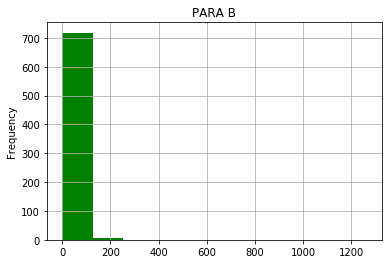

In [70]:
df.PARA_B.plot(kind='hist',color='green')
plt.title('PARA B')
plt.grid()
plt.show()

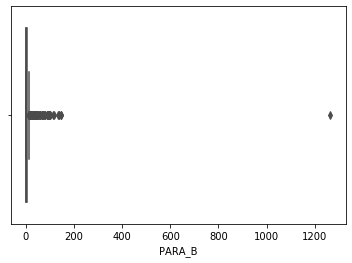

In [71]:
sns.boxplot(df.PARA_B,color='red')
plt.show()

In [72]:
#Finding IQR
iqr=df['PARA_B'].quantile(0.75) - df['PARA_B'].quantile(0.25)
iqr

5.06

In [73]:
LL=df['PARA_B'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['PARA_B'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -7.59
UpperEnd= 12.649999999999999


In [74]:
len(df[df['PARA_B'] > 200])

1

In [75]:
df=df[df['PARA_B'] < 200]

In [76]:
df.shape

(723, 27)

In [77]:
df.groupby('PARA_B')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
PARA_B,,,,,,,,
0.0000,249.0,0.273092,0.446445,0.0,0.0,0.0,1.0,1.0
0.0013,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.0015,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.0017,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.0021,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
111.9000,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
115.8700,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
134.3300,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


# Score_B

In [78]:
df.Score_B.value_counts()

0.2    470
0.6    185
0.4     68
Name: Score_B, dtype: int64

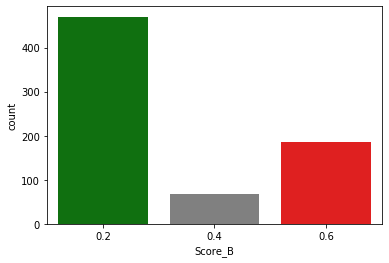

In [79]:
sns.countplot(df.Score_B,palette=['green','grey','red'])
plt.show()

In [80]:
df.groupby('Score_B')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Score_B,,,,,,,,
0.2,470.0,0.272340,0.445638,0.0,0.0,0.0,1.0,1.0
0.4,68.0,0.617647,0.489575,0.0,0.0,1.0,1.0,1.0
0.6,185.0,0.951351,0.215716,0.0,1.0,1.0,1.0,1.0


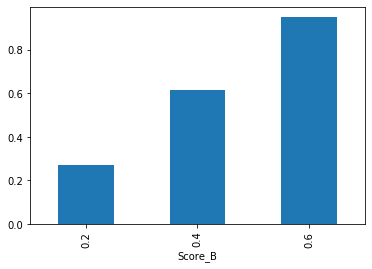

In [81]:
df.groupby('Score_B')['Risk'].mean().plot(kind='bar')
plt.show()

# Risk_B

In [82]:
df.Risk_B.value_counts()

0.00000    249
0.01600     10
0.02200      8
0.05600      7
0.12600      7
          ... 
0.69600      1
0.00042      1
1.75200      1
3.14400      1
7.21800      1
Name: Risk_B, Length: 251, dtype: int64

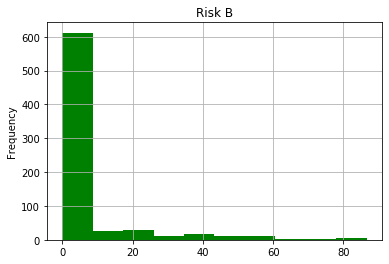

In [83]:
df.Risk_B.plot(kind='hist',color='green')
plt.title('Risk B')
plt.grid()
plt.show()

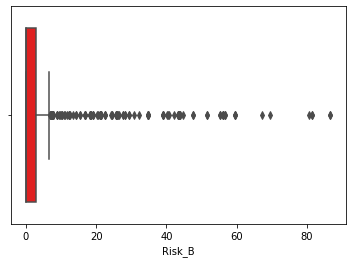

In [84]:
sns.boxplot(df.Risk_B,color='red')
plt.show()

In [85]:
#Finding IQR
iqr=df['Risk_B'].quantile(0.75) - df['Risk_B'].quantile(0.25)
iqr

2.751

In [86]:
LL=df['Risk_B'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['Risk_B'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -4.1265
UpperEnd= 6.8774999999999995


In [87]:
len(df[df['Risk_B'] > 60])

7

In [88]:
df=df[df['Risk_B'] < 60]

In [89]:
df.shape

(716, 27)

In [90]:
df.groupby('Risk_B')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_B,,,,,,,,
0.00000,249.0,0.273092,0.446445,0.0,0.0,0.0,1.0,1.0
0.00026,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00030,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00034,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.00042,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
51.52200,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
55.23000,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
55.95600,5.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


# TOTAL

In [91]:
df.TOTAL.value_counts()

0.00     87
0.08      8
1.10      7
0.43      7
1.67      6
         ..
1.25      1
3.83      1
0.11      1
0.41      1
20.53     1
Name: TOTAL, Length: 332, dtype: int64

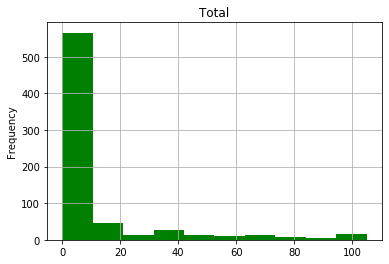

In [92]:
df.TOTAL.plot(kind='hist',color='green')
plt.title('Total')
plt.grid()
plt.show()

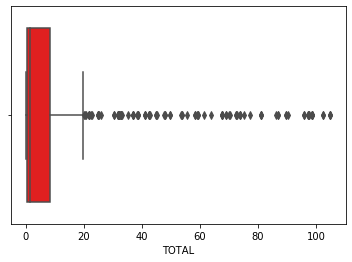

In [93]:
sns.boxplot(df.TOTAL,color='red')
plt.show()

In [94]:
#Finding IQR
iqr=df['TOTAL'].quantile(0.75) - df['TOTAL'].quantile(0.25)
iqr

7.6225000000000005

In [95]:
LL=df['TOTAL'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['TOTAL'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -10.89625
UpperEnd= 19.59375


In [96]:
len(df[df['TOTAL'] > 90])

17

In [97]:
df.groupby('TOTAL')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
TOTAL,,,,,,,,
0.000,87.0,0.287356,0.455153,0.0,0.0,0.0,1.0,1.0
0.010,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.017,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.030,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.050,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
97.110,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
97.600,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
98.760,5.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


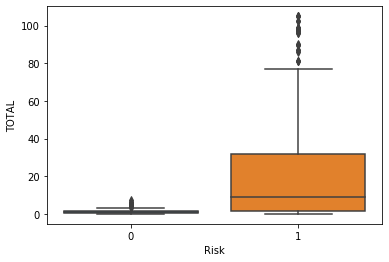

In [98]:
sns.boxplot(y='TOTAL',x='Risk',data=df)
plt.show()

# Numbers

In [99]:
df.numbers.value_counts()

5.0    651
5.5     38
6.0     17
6.5     10
Name: numbers, dtype: int64

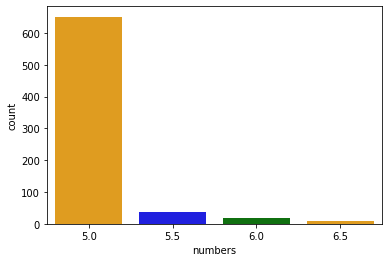

In [100]:
sns.countplot(df.numbers,palette=['orange','blue','green'])
plt.show()

In [101]:
df.groupby('numbers')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
numbers,,,,,,,,
5.0,651.0,0.422427,0.494326,0.0,0.0,0.0,1.0,1.0
5.5,38.0,0.973684,0.162221,0.0,1.0,1.0,1.0,1.0
6.0,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
6.5,10.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


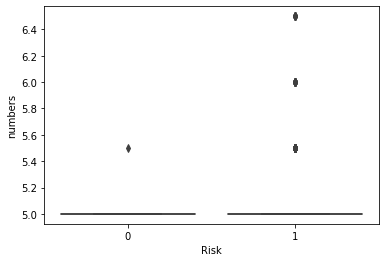

In [102]:
sns.boxplot(y='numbers',x='Risk',data=df)
plt.show()

# Score_B.1

In [103]:
df['Score_B.1'].value_counts()

0.2    651
0.4     38
0.6     27
Name: Score_B.1, dtype: int64

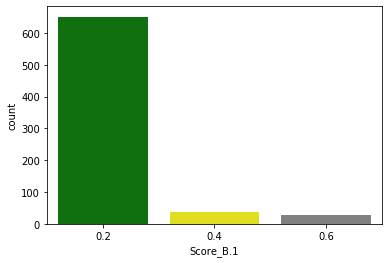

In [104]:
sns.countplot(df['Score_B.1'],palette=['green','yellow','grey'])
plt.show()

In [105]:
df.groupby('Score_B.1')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Score_B.1,,,,,,,,
0.2,651.0,0.422427,0.494326,0.0,0.0,0.0,1.0,1.0
0.4,38.0,0.973684,0.162221,0.0,1.0,1.0,1.0,1.0
0.6,27.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


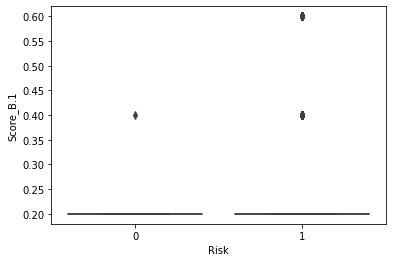

In [106]:
sns.boxplot(y='Score_B.1',x='Risk',data=df)
plt.show()

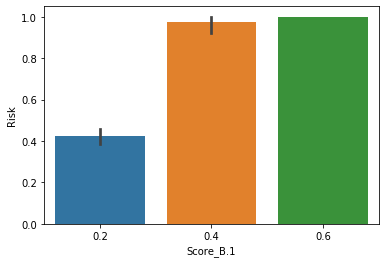

In [107]:
sns.barplot(x='Score_B.1',y='Risk',data=df)
plt.show()

# Risk_C

In [108]:
df.Risk_C.value_counts()

1.0    651
2.2     38
3.6     17
3.9     10
Name: Risk_C, dtype: int64

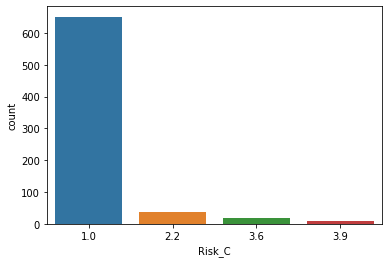

In [109]:
sns.countplot(df['Risk_C'])
plt.show()

In [110]:
df.groupby('Risk_C')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_C,,,,,,,,
1.0,651.0,0.422427,0.494326,0.0,0.0,0.0,1.0,1.0
2.2,38.0,0.973684,0.162221,0.0,1.0,1.0,1.0,1.0
3.6,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3.9,10.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


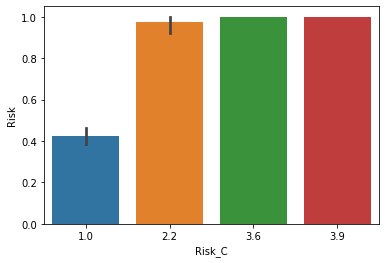

In [111]:
sns.barplot(x='Risk_C',y='Risk',data=df)
plt.show()

# Score_MV

In [112]:
df.Score_MV.value_counts()

0.2    523
0.6    147
0.4     46
Name: Score_MV, dtype: int64

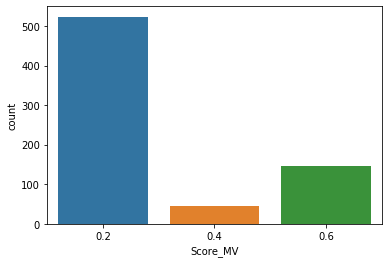

In [113]:
sns.countplot(df['Score_MV'])
plt.show()

In [114]:
df.groupby('Score_MV')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Score_MV,,,,,,,,
0.2,523.0,0.282983,0.450879,0.0,0.0,0.0,1.0,1.0
0.4,46.0,0.956522,0.206185,0.0,1.0,1.0,1.0,1.0
0.6,147.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


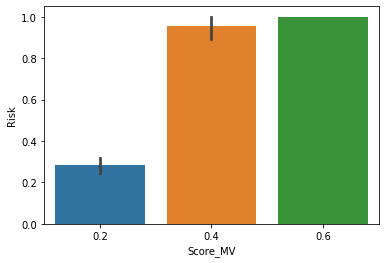

In [115]:
sns.barplot(x='Score_MV',y='Risk',data=df)
plt.show()

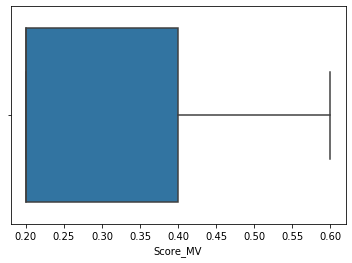

In [116]:
sns.boxplot(df['Score_MV'])
plt.show()

# Risk_D

In [117]:
df.Risk_D.value_counts()

0.000    284
0.012     12
0.004     11
0.008      9
0.022      7
        ... 
0.240      1
0.186      1
0.126      1
0.140      1
3.116      1
Name: Risk_D, Length: 212, dtype: int64

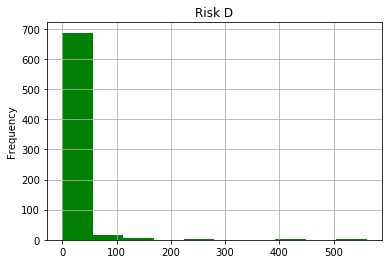

In [118]:
df.Risk_D.plot(kind='hist',color='g')
plt.title('Risk D')
plt.grid()
plt.show()

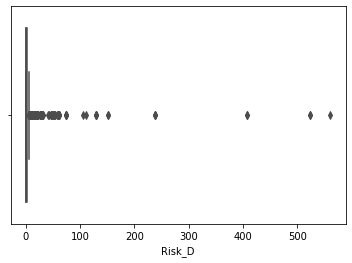

In [119]:
sns.boxplot(df.Risk_D,color='red')
plt.show()

In [120]:
#Finding IQR
iqr=df['Risk_D'].quantile(0.75) - df['Risk_D'].quantile(0.25)
iqr

2.524

In [121]:
LL=df['Risk_D'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['Risk_D'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -3.786
UpperEnd= 6.3100000000000005


In [122]:
len(df[df['Risk_D'] > 200])

8

In [123]:
df=df[df['Risk_D'] < 200]

In [124]:
df.shape

(708, 27)

In [125]:
df.groupby('Risk_D')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_D,,,,,,,,
0.0000,284.0,0.165493,0.372281,0.0,0.0,0.0,0.0,1.0
0.0014,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.0020,6.0,0.166667,0.408248,0.0,0.0,0.0,0.0,1.0
0.0040,11.0,0.363636,0.504525,0.0,0.0,0.0,1.0,1.0
0.0060,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
74.7540,4.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
105.5400,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
109.9200,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


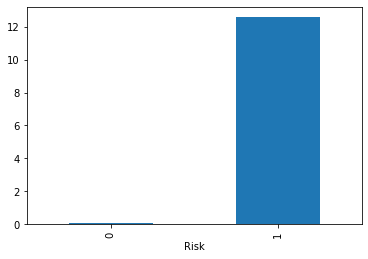

In [126]:
df.groupby('Risk')['Risk_D'].mean().plot(kind='bar')
plt.show()

# District_Loss 

In [127]:
df.District_Loss.value_counts()

2    560
6    103
4     45
Name: District_Loss, dtype: int64

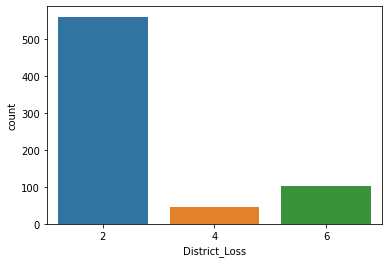

In [128]:
sns.countplot(df['District_Loss'])
plt.show()

In [129]:
df.groupby('District_Loss')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
District_Loss,,,,,,,,
2,560.0,0.362500,0.481152,0.0,0.0,0.0,1.0,1.0
4,45.0,0.555556,0.502519,0.0,0.0,1.0,1.0,1.0
6,103.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


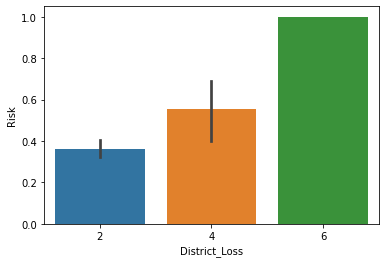

In [130]:
sns.barplot(x='District_Loss',y='Risk',data=df)
plt.show()

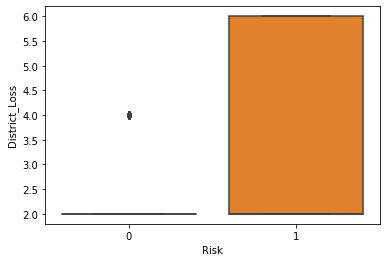

In [131]:
sns.boxplot(y='District_Loss',x='Risk',data=df)
plt.show()

# PROB

In [132]:
df.PROB.value_counts()

0.2    688
0.4     20
Name: PROB, dtype: int64

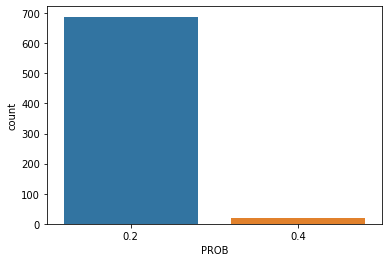

In [133]:
sns.countplot(df.PROB)
plt.show()

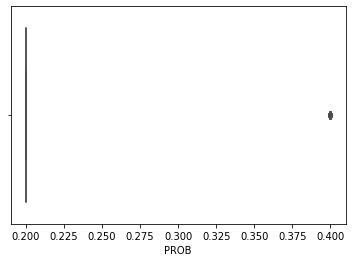

In [134]:
sns.boxplot(df.PROB,color='red')
plt.show()

In [135]:
#Finding IQR
iqr=df['PROB'].quantile(0.75) - df['PROB'].quantile(0.25)
iqr

0.0

In [136]:
LL=df['PROB'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['PROB'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= 0.2
UpperEnd= 0.2


In [137]:
len(df[df['PROB'] > 0.375] )

20

In [138]:
df.shape

(708, 27)

In [139]:
df.groupby('PROB')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
PROB,,,,,,,,
0.2,688.0,0.454942,0.498328,0.0,0.0,0.0,1.0,1.0
0.4,20.0,0.900000,0.307794,0.0,1.0,1.0,1.0,1.0


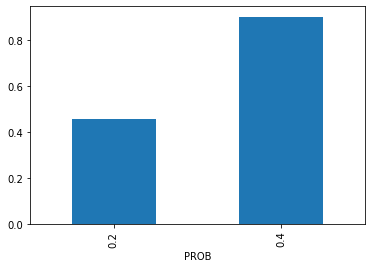

In [140]:
df.groupby('PROB')['Risk'].mean().plot(kind='bar')

# RISK E

In [142]:
df.RiSk_E.value_counts()

0.4    548
1.2     95
0.8     57
2.4      8
Name: RiSk_E, dtype: int64

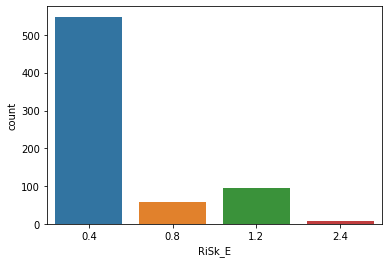

In [143]:
sns.countplot(df.RiSk_E)
plt.show()

In [145]:
df.groupby('RiSk_E')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
RiSk_E,,,,,,,,
0.4,548.0,0.352190,0.478089,0.0,0.0,0.0,1.0,1.0
0.8,57.0,0.614035,0.491150,0.0,0.0,1.0,1.0,1.0
1.2,95.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2.4,8.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


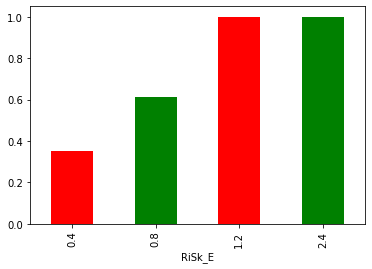

In [149]:
df.groupby('RiSk_E')['Risk'].mean().plot(kind='bar',color=['red','green'])

# History

In [151]:
df.History.value_counts()

0    658
1     37
2      9
4      2
5      1
9      1
Name: History, dtype: int64

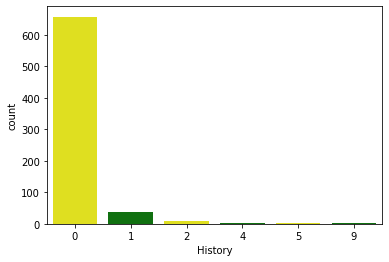

In [152]:
sns.countplot(df.History,palette=['yellow','green'])
plt.show()

In [153]:
df.groupby('History')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
History,,,,,,,,
0,658.0,0.428571,0.495248,0.0,0.0,0.0,1.0,1.0
1,37.0,0.972973,0.164399,0.0,1.0,1.0,1.0,1.0
2,9.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
4,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
5,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
9,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


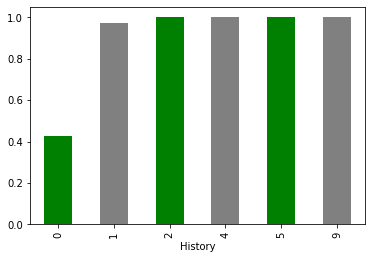

In [158]:
df.groupby('History')['Risk'].mean().plot(kind='bar',color=['green','grey'])
plt.show()

# Prob

In [159]:
df.Prob.value_counts()

0.2    658
0.4     37
0.6     13
Name: Prob, dtype: int64

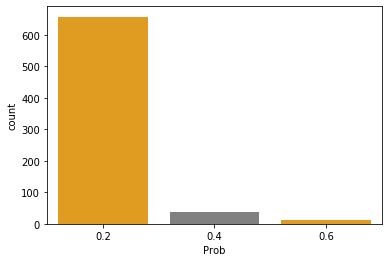

In [161]:
sns.countplot(df.Prob,palette=['orange','grey'])
plt.show()

In [162]:
df.groupby('Prob')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Prob,,,,,,,,
0.2,658.0,0.428571,0.495248,0.0,0.0,0.0,1.0,1.0
0.4,37.0,0.972973,0.164399,0.0,1.0,1.0,1.0,1.0
0.6,13.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


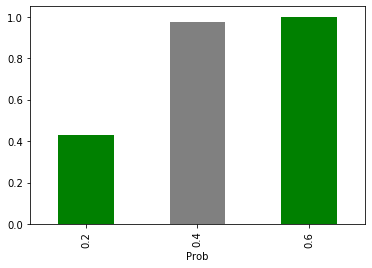

In [163]:
df.groupby('Prob')['Risk'].mean().plot(kind='bar',color=['green','grey'])
plt.show()

# Risk F

In [164]:
df.Risk_F.value_counts()

0.0    658
0.4     37
1.2      9
2.4      2
3.0      1
5.4      1
Name: Risk_F, dtype: int64

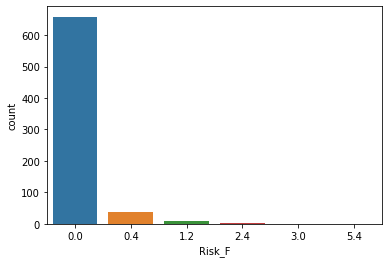

In [165]:
sns.countplot(df.Risk_F)
plt.show()

In [167]:
df.groupby('Risk_F')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_F,,,,,,,,
0.0,658.0,0.428571,0.495248,0.0,0.0,0.0,1.0,1.0
0.4,37.0,0.972973,0.164399,0.0,1.0,1.0,1.0,1.0
1.2,9.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2.4,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3.0,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
5.4,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


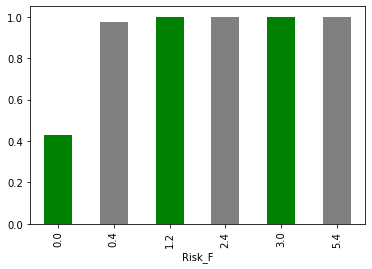

In [168]:
df.groupby('Risk_F')['Risk'].mean().plot(kind='bar',color=['green','grey'])
plt.show()

# Score

In [169]:
df.Score.value_counts()

2.0    232
2.4     91
2.2     80
2.6     57
4.0     37
3.6     33
3.8     29
3.2     28
4.2     23
3.4     21
2.8     20
4.4     16
4.8     14
4.6     12
3.0     11
5.2      4
Name: Score, dtype: int64

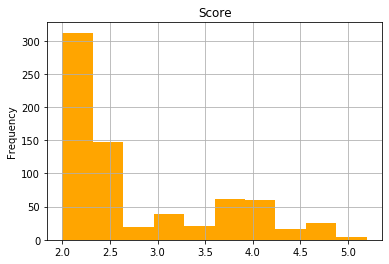

In [171]:
df.Score.plot(kind='hist',color='orange')
plt.title('Score')
plt.grid()
plt.show()

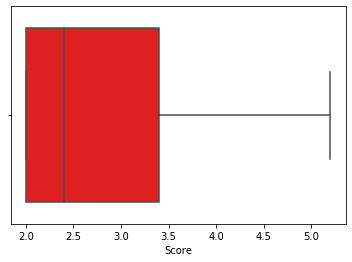

In [172]:
sns.boxplot(df.Score,color='red')
plt.show()

In [173]:
df.groupby('Score')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
2.0,232.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2.2,80.0,0.012500,0.111803,0.0,0.0,0.0,0.0,1.0
2.4,91.0,0.670330,0.472698,0.0,0.0,1.0,1.0,1.0
2.6,57.0,0.596491,0.494962,0.0,0.0,1.0,1.0,1.0
2.8,20.0,0.800000,0.410391,0.0,1.0,1.0,1.0,1.0
3.0,11.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3.2,28.0,0.892857,0.314970,0.0,1.0,1.0,1.0,1.0
3.4,21.0,0.761905,0.436436,0.0,1.0,1.0,1.0,1.0
3.6,33.0,0.969697,0.174078,0.0,1.0,1.0,1.0,1.0


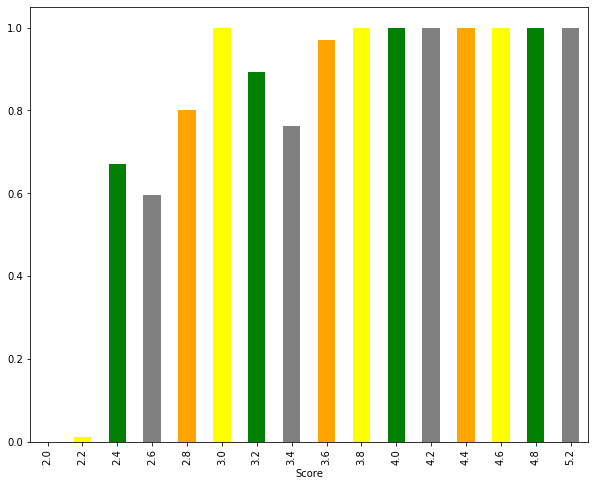

In [178]:
plt.figure(figsize=(10,8))
df.groupby('Score')['Risk'].mean().plot(kind='bar',color=['orange','yellow','green','grey'])
plt.show()

# Inherent_Risk

In [179]:
df.Inherent_Risk.value_counts()

1.400     41
2.200     10
2.228      7
49.052     5
69.218     5
          ..
1.438      1
1.738      1
1.688      1
1.458      1
18.034     1
Name: Inherent_Risk, Length: 411, dtype: int64

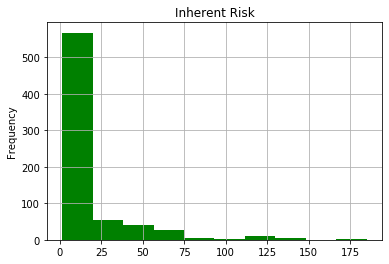

In [181]:
df.Inherent_Risk.plot(kind='hist',color='green')
plt.title('Inherent Risk')
plt.grid()
plt.show()

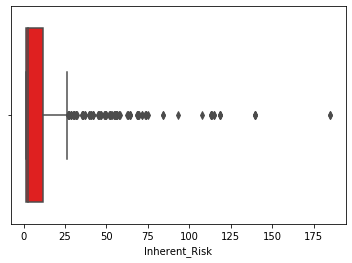

In [182]:
sns.boxplot(df.Inherent_Risk,color='red')
plt.show()

In [183]:
#Finding IQR
iqr=df['Inherent_Risk'].quantile(0.75) - df['Inherent_Risk'].quantile(0.25)
iqr

10.0165

In [184]:
LL=df['Inherent_Risk'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['Inherent_Risk'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -13.393250000000002
UpperEnd= 26.67275


In [185]:
len(df[df['Inherent_Risk'] > 150])

2

In [186]:
df=df[df['Inherent_Risk'] < 150]

In [187]:
df.shape

(706, 27)

In [188]:
df.groupby('Inherent_Risk')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Inherent_Risk,,,,,,,,
1.4000,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.4020,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1.4034,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1.4040,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.4060,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
113.1460,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
113.3920,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
114.9920,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


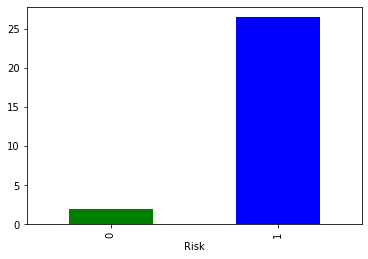

In [191]:
df.groupby('Risk')['Inherent_Risk'].mean().plot(kind='bar',color=['green','blue'])
plt.show()

# CONTROL RISK

In [192]:
df.CONTROL_RISK.value_counts()

0.4    513
1.2     90
0.8     80
1.6      9
2.4      7
2.0      3
3.4      1
3.6      1
4.8      1
5.8      1
Name: CONTROL_RISK, dtype: int64

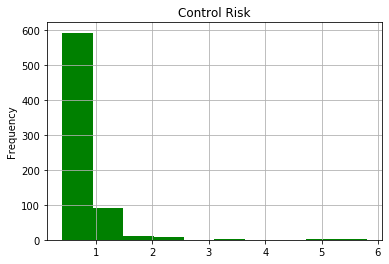

In [193]:
df.CONTROL_RISK.plot(kind='hist',color='green')
plt.title('Control Risk')
plt.grid()
plt.show()

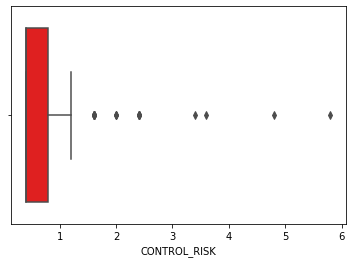

In [194]:
sns.boxplot(df.CONTROL_RISK,color='red')
plt.show()

In [195]:
#Finding IQR
iqr=df['CONTROL_RISK'].quantile(0.75) - df['CONTROL_RISK'].quantile(0.25)
iqr

0.4

In [196]:
LL=df['CONTROL_RISK'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['CONTROL_RISK'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -0.20000000000000007
UpperEnd= 1.4000000000000001


In [198]:
len(df[df['CONTROL_RISK'] > 3])

4

In [199]:
df=df[df['CONTROL_RISK'] < 3]

In [200]:
df.shape

(702, 27)

In [201]:
df.groupby('CONTROL_RISK')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
CONTROL_RISK,,,,,,,,
0.4,513.0,0.309942,0.462921,0.0,0.0,0.0,1.0,1.0
0.8,80.0,0.712500,0.455452,0.0,0.0,1.0,1.0,1.0
1.2,90.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1.6,9.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2.0,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2.4,7.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


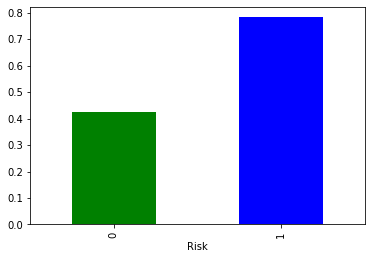

In [202]:
df.groupby('Risk')['CONTROL_RISK'].mean().plot(kind='bar',color=['green','blue'])
plt.show()

# Detection_Risk

In [203]:
df.Detection_Risk.value_counts()

0.5    702
Name: Detection_Risk, dtype: int64

**As we can see that the variable Detection Risk having constant value,so we can drop that variable**

In [204]:
df.drop(['Detection_Risk'],axis=1)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096,0
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.156,0.4,0.4312,0
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.2,0.4,0,0.2,0.0,2.4,4.372,0.4,0.8744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3.41,12,1.07,0.4,0.428,0.00,0.2,0.000,1.07,5.0,...,0.2,1.2,0,0.2,0.0,2.6,2.628,1.2,1.5768,1
401,1.85,19,9.14,0.6,5.484,1.22,0.4,0.488,10.36,5.0,...,0.2,1.2,0,0.2,0.0,3.4,8.172,1.2,4.9032,1
166,3.41,14,16.53,0.6,9.918,72.99,0.6,43.794,89.52,5.0,...,0.2,0.4,1,0.4,0.4,4.0,57.708,0.8,23.0832,1
325,2.37,2,7.59,0.6,4.554,1.47,0.4,0.588,9.06,5.5,...,0.2,1.2,0,0.2,0.0,4.2,30.316,1.2,18.1896,1


# Audit_Risk

In [205]:
df.Audit_Risk.value_counts()

0.2800    41
1.3200    10
1.3368     6
1.7580     5
0.3156     5
          ..
0.3560     1
0.3364     1
0.3416     1
0.3512     1
3.6068     1
Name: Audit_Risk, Length: 417, dtype: int64

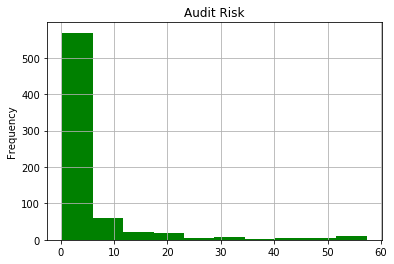

In [207]:
df.Audit_Risk.plot(kind='hist',color='green')
plt.title('Audit Risk')
plt.grid()
plt.show()

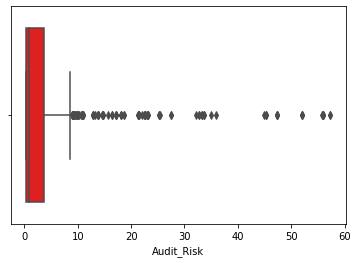

In [208]:
sns.boxplot(df['Audit_Risk'],color='red')
plt.show()

In [209]:
#Finding IQR
iqr=df['Audit_Risk'].quantile(0.75) - df['Audit_Risk'].quantile(0.25)
iqr

3.3112

In [211]:
LL=df['Audit_Risk'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
UL=df['Audit_Risk'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',UL)

LowerEnd= -4.642
UpperEnd= 8.6028


In [212]:
len(df[df['Audit_Risk'] >40])

18

In [213]:
df.groupby('Audit_Risk')['Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Audit_Risk,,,,,,,,
0.28000,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.28040,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
0.28068,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
0.28080,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.28120,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
47.36160,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
52.01200,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
55.72640,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


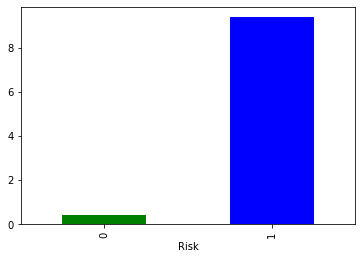

In [214]:
df.groupby('Risk')['Audit_Risk'].mean().plot(kind='bar',color=['green','blue'])
plt.show()

In [216]:
cormat=df.corr()
cormat

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.128489,-0.235427,-0.368159,-0.237723,-0.256689,-0.183373,-0.250312,-0.282052,-0.146365,...,-0.118163,-0.123514,-0.123514,-0.117126,-0.300767,-0.281913,-0.155547,NaN,-0.237224,-0.349831
LOCATION_ID,-0.128489,1.000000,0.082932,0.122505,0.082441,0.068382,0.093678,0.067618,0.080444,-0.106778,...,0.066008,0.034480,0.034480,0.024054,0.084950,0.044199,0.070201,NaN,0.020560,0.104950
PARA_A,-0.235427,0.082932,1.000000,0.569215,0.998862,0.352478,0.405959,0.350737,0.532287,0.147202,...,0.087109,0.241644,0.241644,0.224799,0.481054,0.393316,0.170519,NaN,0.403826,0.385958
Score_A,-0.368159,0.122505,0.569215,1.000000,0.577257,0.445379,0.588175,0.441916,0.523664,0.207168,...,0.066809,0.302976,0.302976,0.280731,0.721986,0.470416,0.174477,NaN,0.435998,0.562453
Risk_A,-0.237723,0.082441,0.998862,0.577257,1.000000,0.357050,0.407867,0.355154,0.536158,0.149161,...,0.089389,0.245055,0.245055,0.228271,0.486311,0.399508,0.174010,NaN,0.410252,0.392062
PARA_B,-0.256689,0.068382,0.352478,0.445379,0.357050,1.000000,0.658758,0.999484,0.979798,0.405307,...,-0.041675,0.393641,0.393641,0.399754,0.688814,0.748679,0.123061,NaN,0.642857,0.436514
Score_B,-0.183373,0.093678,0.405959,0.588175,0.407867,0.658758,1.000000,0.658859,0.682803,0.309890,...,-0.039750,0.332719,0.332719,0.311670,0.904088,0.544796,0.089293,NaN,0.455644,0.591697
Risk_B,-0.250312,0.067618,0.350737,0.441916,0.355154,0.999484,0.658859,1.000000,0.978952,0.404736,...,-0.039650,0.392250,0.392250,0.398720,0.686878,0.743155,0.124499,NaN,0.638487,0.430848
TOTAL,-0.282052,0.080444,0.532287,0.523664,0.536158,0.979798,0.682803,0.978952,1.000000,0.396947,...,-0.020072,0.405948,0.405948,0.408214,0.725004,0.760082,0.146273,NaN,0.665413,0.476643
numbers,-0.146365,-0.106778,0.147202,0.207168,0.149161,0.405307,0.309890,0.404736,0.396947,1.000000,...,0.043129,0.114151,0.114151,0.126726,0.524550,0.454442,0.090649,NaN,0.387459,0.279018


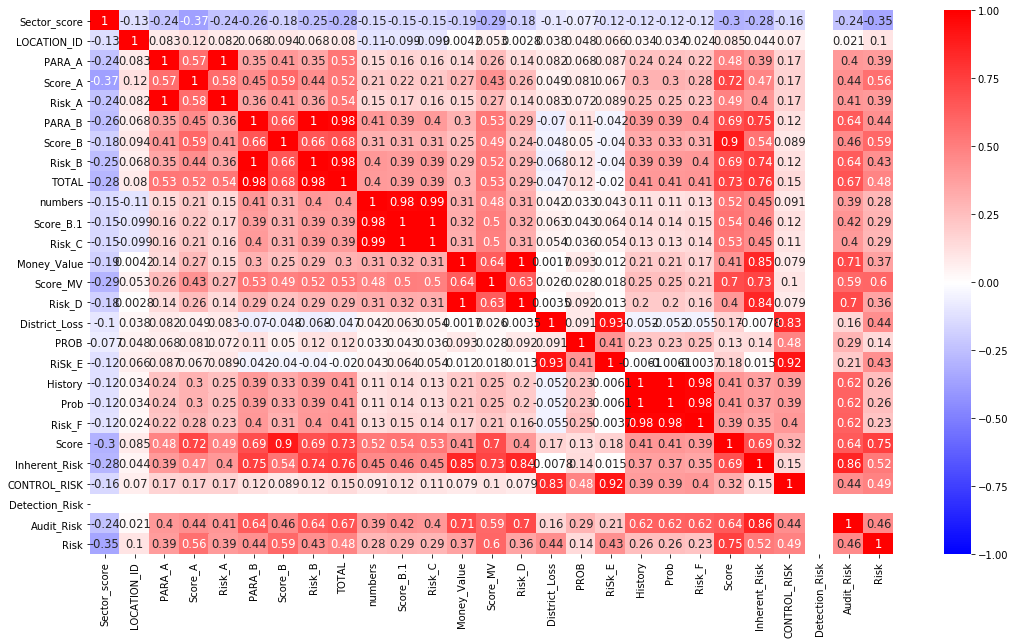

In [219]:
plt.figure(figsize = (18,10))
sns.heatmap(cormat,annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})
